In [15]:
require("rtdists")#Package to generate RT from a range of models, including the (simple) diffusion model presented in class

### Simulating RT data from a choice RT task

Reminder of the diffusion model (simple version):

<img src='plots/DDM_par.png'>

accumulation speed ($v$) $\rightarrow$ processing speed of the stimulus

decision boundary ($a$) $\rightarrow$ response precaution

Non-decision time ($T_{er}$ ou $t_0$) $\rightarrow$ residual time (e.g. stimulus encoding and response execution)
\end{itemize}

# Simulating one participant

In [27]:
syndata = rdiffusion(10, a=1, v=.2, t0=.3)# Simulating 10 trials with a boundary parameter of 1, drift of 2 and t0 of 300 ms


We created a dataframe with two columns, rt for reaction time and response for the choice made by the participant

In [17]:
head(syndata)

,rt,response
,<dbl>,<fct>
1,0.5362445,upper
2,0.3885129,lower
3,0.5412303,upper
4,0.8512839,lower
5,0.6937874,upper
6,0.6530603,lower


The response column indicates at which boundary the decision variable stopped. In this example as $v$ is positive, the decision variable is biased towards the upper ('correct') bound

_NB : For pedagogical purposes, we will only explore the correct responses even if we should also analyse the incorrect ones (note also that the simplified version of the diffusion model I show, predicts equal rt for errors and correct, which is rarely observed)_


In [28]:
syndata = syndata[syndata$response == "upper",]

### Sampling from a known distribution

This is the density function we sampled from :

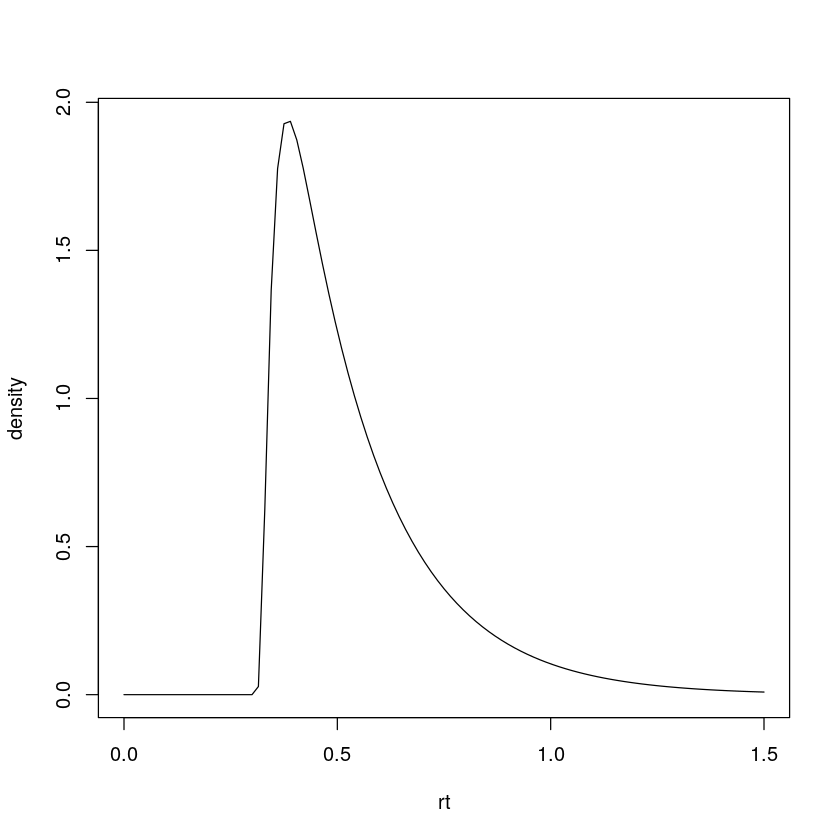

In [19]:
curve(ddiffusion(x, a=1, v=.1, t0=0.3, response = "upper"),
      xlim=c(0,1.5), main="", 
      ylab="density", xlab="rt")

Based on the equation presented last week (Wagenmakers, van der Maas and Grasman, 2007), we can compute the expected mean RT

In [29]:
MRT_hat <- function(a, v, t0){
    y = -v*a #s = 1
    MRT = (a/(2*v))*((1-exp(y))/(1+exp(y)))+t0
    return(MRT)
}
print(MRT_hat(a=1, v=.2, t0=.3))

[1] 0.54917


And compare it to the observed mean rt

In [30]:
mean(syndata$rt)

[1] 0.7732804

In [31]:
print(MRT_hat(a=1, v=.2, t0=.3) - mean(syndata$rt),2)


[1] -0.22


As expected, if we increase our sample size the observed mean RT ($\overline{RT}$) gets closer to the predicted mean RT ($\hat{RT}$)

In [32]:
syndata_large = rdiffusion(10000, a=1, v=.2, t0=.3)# Simulating 10000 trials

syndata_large = syndata_large[syndata_large$response == "upper",]

In [33]:
print(MRT_hat(a=1, v=.2, t0=.3) - mean(syndata_large$rt),2)

[1] 0.0019


### Plotting distribution of a single participant

We can also plot the observed distribution using a histogram and compare it to the density function above

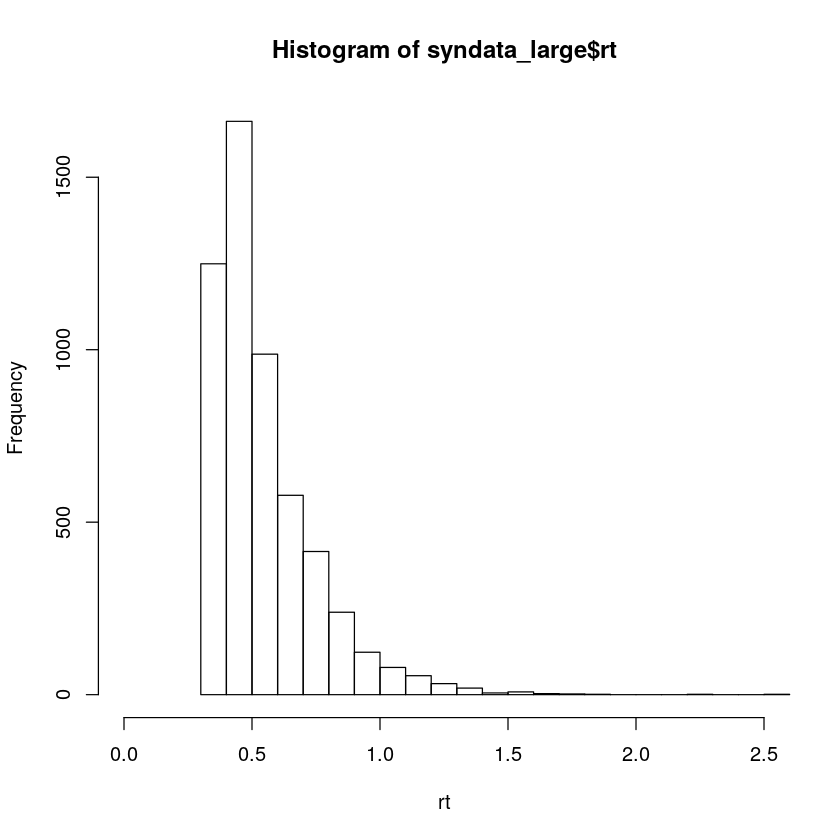

In [38]:
hist(syndata_large$rt,xlim=c(0,2.5),breaks=20, xlab="rt")
#Note that the "break" argument discretizes the distribution you can play with it and observe the changes on the visualisation

If we play around with the parameters we can change the generated distribution

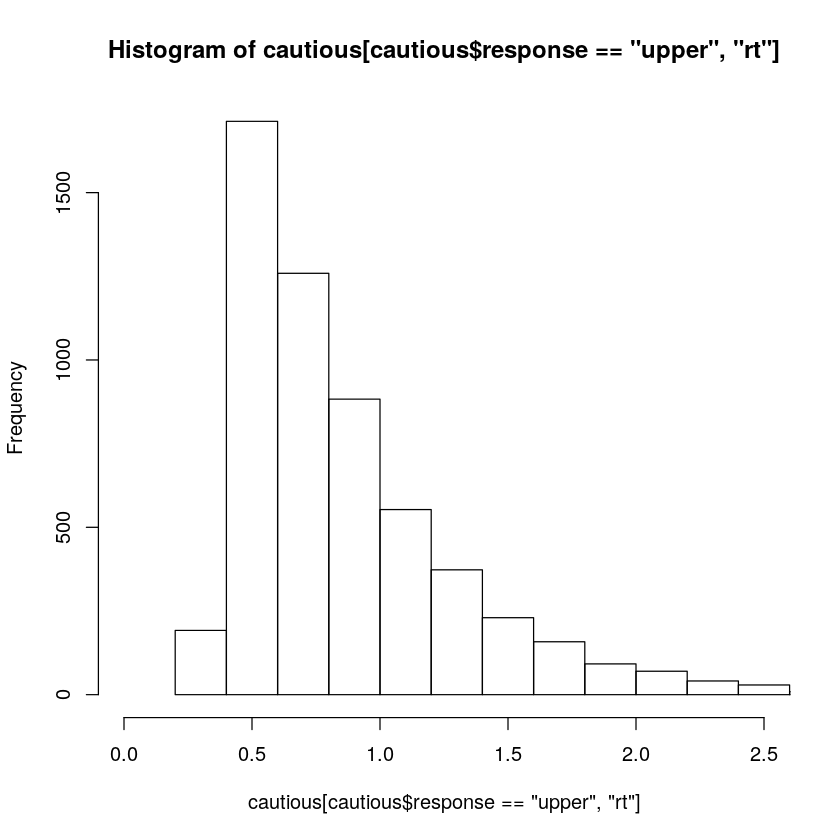

In [39]:
cautious = rdiffusion(10000, a=1.5, v=.2, t0=0.3)#added 0.5 to the boundary parameter
hist(cautious[cautious$response == "upper","rt"],xlim=c(0,2.5),breaks=20)

Here we show that increasing boundaries slows rt and adds even more mass in the right tail than previously

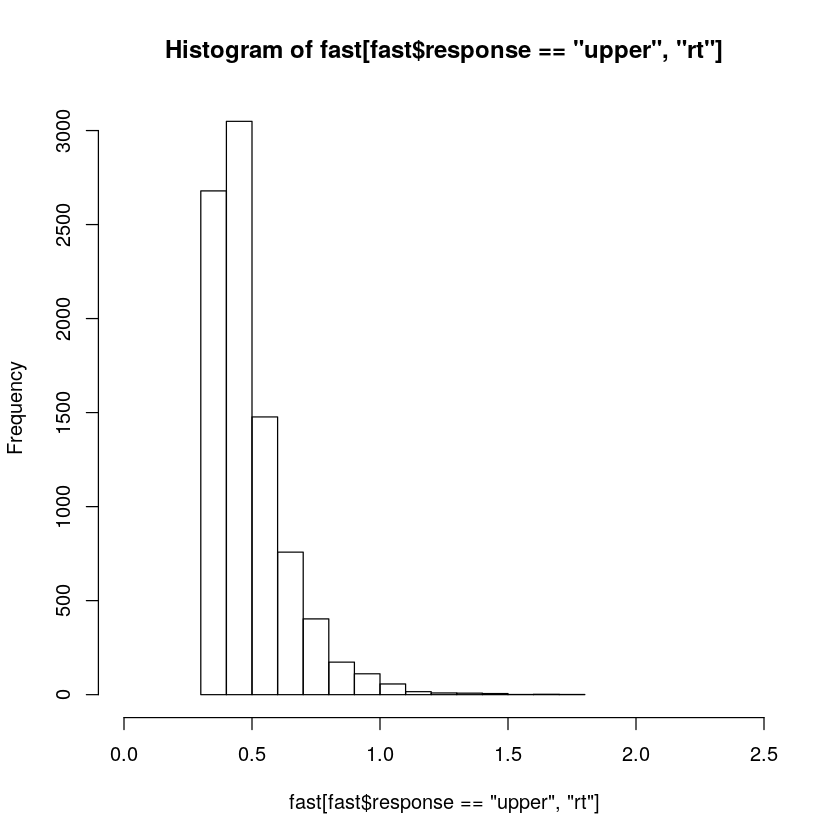

In [41]:
fast = rdiffusion(10000, a=1, v=2, t0=)#
hist(fast[fast$response == "upper","rt"],xlim=c(0,2.5),breaks=20)

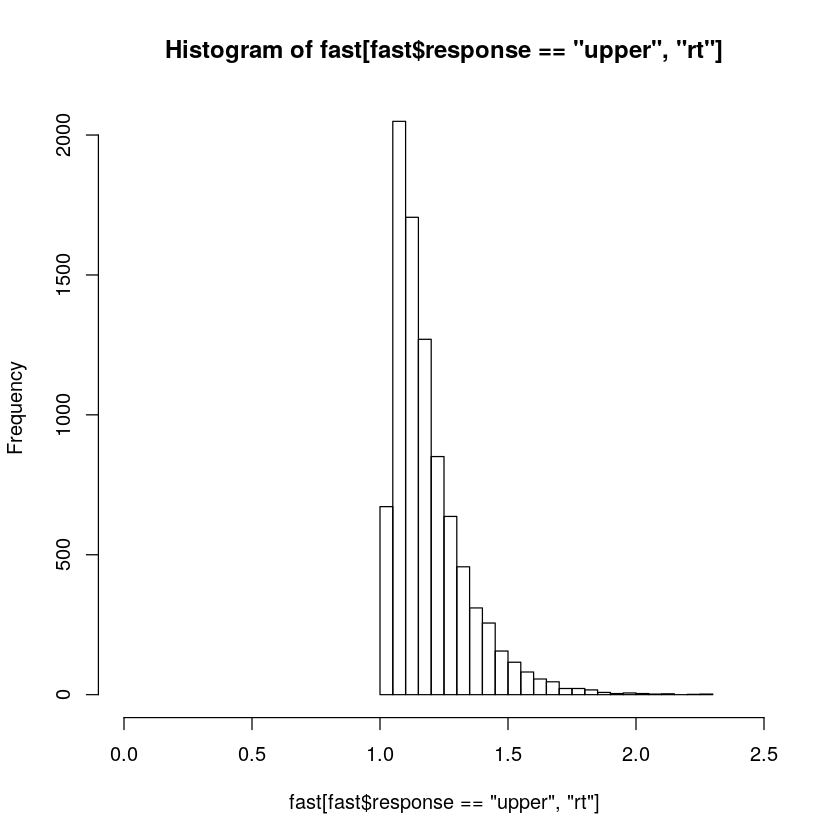

In [42]:
fast = rdiffusion(10000, a=1, v=2, t0=1)#
hist(fast[fast$response == "upper","rt"],xlim=c(0,2.5),breaks=20)

Contrary to the boundary parameter, increasing the drift rate parameter has little effect on the distribution (slightly faster RTs), but it does highly increase the number of correct responses :

In [14]:
print(length(fast$response))#only correct responses so I can get the information by looking at the length of the RT vector
print(length(syndata_large$response))

[1] 10000
[1] 5478


# Exercice

- Create a participant that execute responses slower than the one simulated here and plot the histograms to compare